#                                Avocado Project

In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error


df = pd.read_csv( "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv.zip", compression='zip')

In [5]:

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  int64         
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
 14  Month         18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [10]:

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


X_classification = df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Month']]
y_classification = df['type']


X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)


clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf_scaled, y_train_clf)


y_pred_clf = clf_model.predict(X_test_clf_scaled)


print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))


X_regression = df[['Total Volume', '4046', '4225', '4770', 'type', 'Month']]
y_regression = df['AveragePrice']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_reg_scaled, y_train_reg)


y_pred_reg = reg_model.predict(X_test_reg_scaled)


mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("\nMean Absolute Error (Regression):", mae)



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1820
           1       0.99      0.98      0.99      1830

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650

Confusion Matrix:
 [[1805   15]
 [  28 1802]]

Mean Absolute Error (Regression): 0.13995035616438353


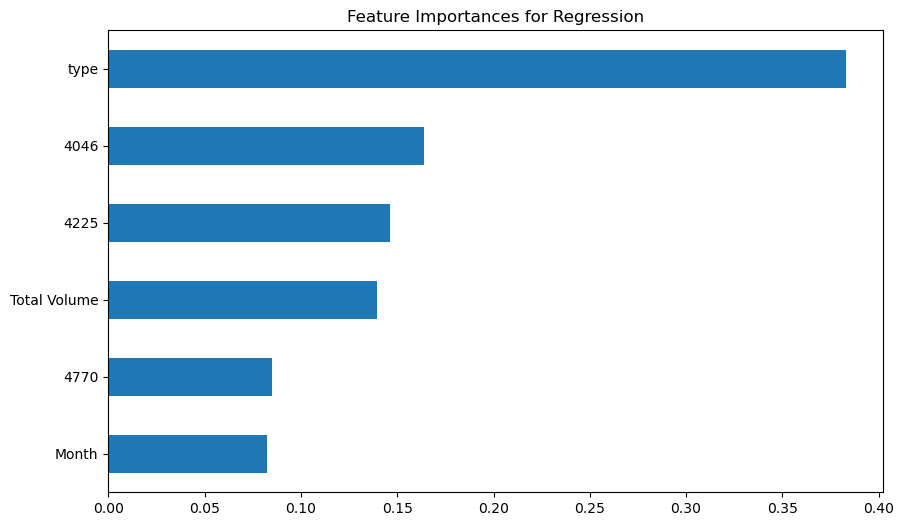

In [8]:
feature_importances = pd.Series(reg_model.feature_importances_, index=X_regression.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances for Regression")
plt.show()